# Pure Python evaluation of vector norms

Generate a list of random floats of a given dimension (dim), and store its result in the variable `vec`.

In [1]:
# This is used for plots and numpy
%pylab inline 

import random
dim = int(1000)

# YOUR CODE HERE
random.seed(0)
vec = [ random.random() for _ in range(dim)]
#raise NotImplementedError()

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.testing import *

assert_equal(type(vec), list)
assert_equal(len(vec), dim)
for ob in vec:
    assert_equal(type(ob), float)

Write a function that evaluates the $l_p$ norm of a vector in $R^d$. We remind:
$$
\|v \|_{p} := \left(\sum_i (v_i)^p\right)^{1/p}
$$

the function should take as arguments a `list`, containing your $R^d$ vector, and a number `p` in the range $[1, \infty]$, indicating the exponent of the norm. 

**Note:** an infinite float number is given by `float("inf")`.

Throw an assertion (look it up on google!) if the exponent is not in the range you expect.

In [3]:
def p_norm(vector,p):
    # YOUR CODE HERE
    assert (p>0 or p<float("inf")), "exception!"
    x=0
    for i in range(0,len(vector)):
        x+=vector[i]**p
    x=x**(1/p)
    return x
    raise NotImplementedError()

vector=vec
P=2

norm = p_norm(vec,P)
print(norm)

18.180233358975737


In [5]:
assert_equal(p_norm(range(10),1), 45.0)
assert_equal(p_norm([3,4], 2), 5.0)

In [4]:
assert_equal(p_norm([-1,-.5,.5], float("inf")), 1)

In [4]:
assert_raises(AssertionError, p_norm, [2,3], 0)
assert_raises(AssertionError, p_norm, [2,3], -1)

# Playing with condition numbers


In this exercise you will have to figure out what are the optimal
values of the stepping interval when approximating derivatives using
the finite difference method. See here_ for a short introduction on
how to run these programs on SISSA machines.

## 1. Finite differences
Write a program to compute the finite difference (`FD`)
approximation of the derivative of a function `f`, computed at
point `x`, using a stepping of size `h`. Recall the definition of
approximate derivative:

$$
FD(f,x,h) := \frac{f(x+h)-f(x)}{h}
$$

In [5]:
def FD(f, x, h):
    # YOUR CODE HERE
    y=f(x+h)-f(x)
    y/=h
    return y
    raise NotImplementedError()

In [6]:
assert_equal(FD(lambda x: x, 0, .125), 1.0)

## 2. Compute FD

Evaluate this function for the derivative of `sin(x)` evaluated at `x=1`, for values of `h` equal to `1e-i`, with `i=0,...,20`. Store the values of the finite differences in the list `fd1`.

In [18]:
# YOUR CODE HERE
fd1 = []
err = []
ivalues = []
for i in range(0,21):
    ivalues.append(10**(-i))
    fd1.append(FD(sin, 1, 10**(-i)))
    err.append(abs(FD(sin, 1, 10**(-i))-cos(1.0)))
print(fd1)
#raise NotImplementedError()

#here I try to find h minumum as said in Following Numerical Recipes in C, 
#Chapter 5.7 (from wikipedia)
from math import sqrt
x = 1
epsi = 2.2e-16
hh = sqrt(epsi)*x
h1 = 1e-8
print(hh)
prova = FD(sin, x, hh)
errore = prova - cos(1)
print(errore)

[0.067826442017785205, 0.49736375253538911, 0.53608598101186899, 0.5398814803603269, 0.54026023141862112, 0.54029809850586474, 0.54030188512133037, 0.54030226404044868, 0.54030230289825454, 0.54030235840940577, 0.54030224738710331, 0.54030113716407868, 0.54034554608506369, 0.53956838996782608, 0.5440092820663267, 0.55511151231257827, 0.0, 0.0, 0.0, 0.0, 0.0]
1.4832396974191326e-08
-9.36792610151e-09


In [7]:
assert_equal(len(fd1), 21)
expected = [0.067826442017785205, 0.49736375253538911, 0.53608598101186899, 0.5398814803603269, 0.54026023141862112, 0.54029809850586474, 0.54030188512133037, 0.54030226404044868, 0.54030229179602429, 0.54030235840940577, 0.54030224738710331, 0.54030113716407868, 0.54034554608506369, 0.53956838996782608, 0.53290705182007514, 0.55511151231257827, 0.0, 0.0, 0.0, 0.0, 0.0]
assert_almost_equal(fd1,expected,decimal=4)

## 3. Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.

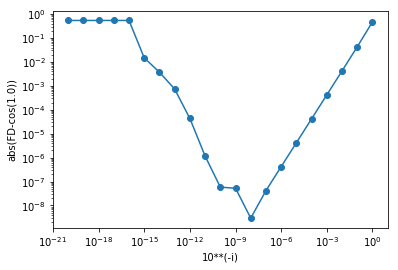

In [26]:
# YOUR CODE HERE
plt.xscale('log')
plt.yscale('log')
plt.xlabel('10**(-i)')
plt.ylabel('abs(FD-cos(1.0))')
plt.plot(ivalues,err, '-o')
plt.show()

YOUR ANSWER HERE:
We can see that starting from h = 10 and decreasing it, the computed derivative approximates better its exact value, due to the convergence of the limit.
However, if we exceed in decreasing h come into play the problems regarding floating-point arithmetic of computers: the subtraction f(x+h)-f(x) of two nearly equal numbers will give a large rounding error due to the truncation made by the machine, and in the end we have a loss of significance, which means that too many significant digits have been canceled, and we obtain a bigger final error.
I found on the internet (in Following Numerical Recipes in C, Chapter 5.7 (from wikipedia)) that A choice for h which is small without producing a large rounding error is h = sqrt(ε)*x 


## 4. Error plots base 2
Repeate step 2 and 3 above, but using powers of `2` instead of powers of `10`, i.e., using `h` equal to `2**(-i)` for `i=1,...,60`. Do you see differences? How do you explain these differences? Shortly comment.  A good way to emphasize the result is to give the option `'-o'` to the plot command.

0.03125
0.01
[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 7.450580596923828e-09, 3.725290298461914e-09, 1.862645149230957e-09, 9.313225746154785e-10, 4.656612873077393e-10, 2.3283064365386963e-10, 1.1641532182693481e-10, 5.820766091346741e-11, 2.9103830456733704e-11, 1.4551915228366852e-11, 7.275957614183426e-12, 3.637978807091713e-12, 1.8189894035458565e-12, 9.094947017729282e-13, 4.547473508864641e-13, 2.2737367544323206e-13, 1.1368683772161603e-13, 5.684341886080802e-14, 2.842170943040401e-14, 1.4210854715202004e-14, 7.105427357601002e-15, 3.552713678800501e-15, 1.7763568394002505e-15, 8.881784197001252e-16, 4.44

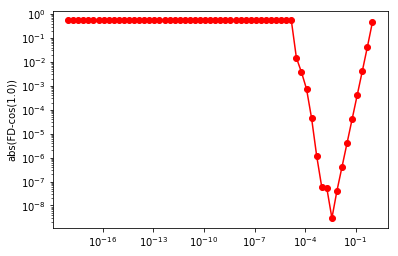

In [54]:
import numpy as np

fd1_2 = []
err_2 = []
ivalues_2 = []
for i in range(0,61):
    ivalues_2.append(2**(-i))
    fd1_2.append(FD(sin, 1, 2**(-i)))
    err_2.append(abs(FD(sin, 1, 10**(-i))-cos(1.0)))

print(2**(-5))
print(10**(-2))
print(ivalues_2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('abs(FD-cos(1.0))')
plt.plot(ivalues_2,err_2, '-ro')
plt.show()

YOUR ANSWER HERE

YOUR ANSWER HERE

## 5. Central Finite Differences
Write a function that computes the central finite difference approximation (`CFD`), defined as 

$$
CFD(f,x,h) := \frac{f(x+h)-f(x-h)}{2h}
$$


In [45]:
def CFD(f, x, h):
    # YOUR CODE HERE
    y=f(x+h)-f(x-h)
    y/=2*h
    return y
    raise NotImplementedError()

In [27]:
assert_equal(CFD(lambda x: x**2, 0.0, .5), 0.0)
assert_equal(CFD(lambda x: x**2, 1.0, .5), 2.0)

## 6. Error plots for CFD

Repeat steps 2., 3. and 4. and explain what you see. What is the *order* of the approximation 1. and what is the order of the approximation 5.? What's the order of the cancellation errors? 

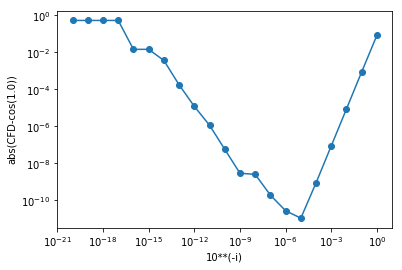

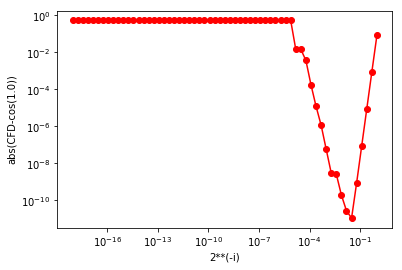

In [46]:
# YOUR CODE HERE
#step 2:
fd1 = []
err = []
ivalues = []
for i in range(0,21):
    ivalues.append(10**(-i))
    fd1.append(CFD(sin, 1, 10**(-i)))
    err.append(abs(CFD(sin, 1, 10**(-i))-cos(1.0)))
    
assert_equal(len(fd1), 21)
expected = [0.067826442017785205, 0.49736375253538911, 0.53608598101186899, 0.5398814803603269, 0.54026023141862112, 0.54029809850586474, 0.54030188512133037, 0.54030226404044868, 0.54030229179602429, 0.54030235840940577, 0.54030224738710331, 0.54030113716407868, 0.54034554608506369, 0.53956838996782608, 0.53290705182007514, 0.55511151231257827, 0.0, 0.0, 0.0, 0.0, 0.0]
#assert_almost_equal(fd1,expected,decimal=4)

#step 3
plt.xscale('log')
plt.yscale('log')
plt.xlabel('10**(-i)')
plt.ylabel('abs(CFD-cos(1.0))')
plt.plot(ivalues,err, '-o')
plt.show()

#step 4 

fd1_2 = []
err_2 = []
ivalues_2 = []
for i in range(0,61):
    ivalues_2.append(2**(-i))
    fd1_2.append(CFD(sin, 1, 2**(-i)))
    err_2.append(abs(CFD(sin, 1, 10**(-i))-cos(1.0)))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('2**(-i)')
plt.ylabel('abs(CFD-cos(1.0))')
plt.plot(ivalues_2,err_2, '-ro')
plt.show()

YOUR ANSWER HERE

# Numpy

Numpy provides a very powerful array container. The first line of this ipython notebook has imported all of numpy functionalities in your notebook, just as if you typed::

    from numpy import *
    
Create a numpy array whith entries that range form 0 to 64. Use the correct numpy function to do so. Call it `x`. 

In [56]:
from numpy import *

x = np.arange(64)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [57]:
assert_equal(type(x), ndarray)
assert_equal(len(x), 64)
for i in range(64):
    assert_equal(x[i], float(i))

Reshape the one dimensional array, to become a 4 rows 2 dimensional array, let numpy evaluate the correct number of culumns. Call it `y`.

In [58]:
y = x.reshape(4,-1)
print(y)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]]


In [59]:
assert_equal(shape(y), (4,16))

Get the following *slices* of `y`:

* All the rows and the first three colums. Name it `sl1`.
* All the colums and the first three rows. Name it `sl2`.
* Third to sixth (included) columns and all the rows. Name it `sl3`.
* The last three columns and all the rows. Name it `sl4`.

In [60]:
sl1 = y[:,:3]
sl2 = y[:3,:]
sl3 = y[:,3:7]
sl4 = y[:,-3:]

In [61]:
assert_equal(sl1,[[0,1,2],[16,17,18],[32,33,34],[48,49,50]])
assert_equal(sl2,[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]])
assert_equal(sl3,[[3,4,5,6],[19,20,21,22],[35,36,37,38],[51,52,53,54]])
assert_equal(sl4,[[13,14,15],[29,30,31],[45,46,47],[61,62,63]])

Now reshape the array, as if you wanted to feed it to a fortran routine. Call it `z`.

In [62]:
z = transpose(y)
print(z)

[[ 0 16 32 48]
 [ 1 17 33 49]
 [ 2 18 34 50]
 [ 3 19 35 51]
 [ 4 20 36 52]
 [ 5 21 37 53]
 [ 6 22 38 54]
 [ 7 23 39 55]
 [ 8 24 40 56]
 [ 9 25 41 57]
 [10 26 42 58]
 [11 27 43 59]
 [12 28 44 60]
 [13 29 45 61]
 [14 30 46 62]
 [15 31 47 63]]


Comment on the result, what has changed with respect to `y`? 

YOUR ANSWER HERE

Set the fourth element of `x` to 666666, and print `x`, `y`, `z`. Comment on the result

In [63]:
x[4] = 666666
print(x)
print(y)
print(z)

[     0      1      2      3 666666      5      6      7      8      9
     10     11     12     13     14     15     16     17     18     19
     20     21     22     23     24     25     26     27     28     29
     30     31     32     33     34     35     36     37     38     39
     40     41     42     43     44     45     46     47     48     49
     50     51     52     53     54     55     56     57     58     59
     60     61     62     63]
[[     0      1      2      3 666666      5      6      7      8      9
      10     11     12     13     14     15]
 [    16     17     18     19     20     21     22     23     24     25
      26     27     28     29     30     31]
 [    32     33     34     35     36     37     38     39     40     41
      42     43     44     45     46     47]
 [    48     49     50     51     52     53     54     55     56     57
      58     59     60     61     62     63]]
[[     0     16     32     48]
 [     1     17     33     49]
 [     2     

YOUR ANSWER HERE: We can see here that all the fourth elements of the three arrays x, y and z become 666666. This happens because with y and z I am creating a shallow copy of x (and not a deep copy), that is those objects are not real copies of x but instead contain the references of it.

## Arrays and Matrices

Define 2 arrays, `A` of dimensions (2,3) and `B` of dimension (3,4).

* Perform the operation `C = A.dot(B)`. Comment the result, or the error you get.

In [70]:
A = np.ndarray(shape=(2,3), dtype=float)
B = np.ndarray(shape=(3,4), dtype=float)
C = A.dot(B)
print(A)

[[  7.74860419e-304   7.74860419e-304   7.74860419e-304]
 [  7.74860419e-304   7.74860419e-304   7.74860419e-304]]
[[  6.93158984e-310   3.56839506e-316   1.58101007e-322   3.95252517e-322]
 [  3.56839506e-316   6.93158252e-310   6.93158252e-310   6.93158252e-310]
 [  6.93158252e-310   6.93158252e-310   6.93158252e-310   6.93158252e-310]]
[[  7.74860419e-304   7.74860419e-304   7.74860419e-304]
 [  7.74860419e-304   7.74860419e-304   7.74860419e-304]]


In [65]:
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

YOUR ANSWER HERE:
The numpy "dot" operation performs the dot product between two arrays, an array and a matrix or two matrices. In this case, as it is able to understand that we have two matrices, it is performing a matrix-matrix multiplication.

* Perform the operation `C = A*(B)`. Comment the result, or the error you get.

In [53]:
C = A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,4) 

YOUR ANSWER HERE:
In this case I get an error. The * operation is element wise, but A and B have more than one dimension, and so this operation becomes impossible.

 * Convert A and B, from arrays to matrices and perform `A*B`. Comment the result.

In [77]:
A = np.asmatrix(A)
B = np.asmatrix(B)
C = A*B
print(C)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [78]:
assert_equal(type(A),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(B),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(C),numpy.matrixlib.defmatrix.matrix)
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

YOUR ANSWER HERE:
In this case A and B are both matrices, so the * product worksas matrix-matrix product.

# Playing with polynomials

The polynomial `(1-x)^6` can be expanded to::
     
     x^6 - 6*x^5 + 15*x^4 - 20*x^3 + 15*x^2 - 6*x + 1

   The two forms above are equivalent from a mathematical point of
   view, but may yield different results in a computer machine.

   Compute and plot the values of this polynomial, using each of the
   two forms, for 101 equally spaced points in the interval
   `[0.995,1.005]`, i.e., with a spacing of 0.0001 (use linspace).
   
   Can you explain this behavior?


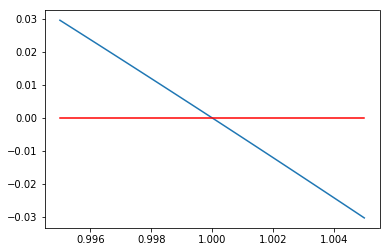

In [79]:
p1 = np.poly1d([-1,0,0,0,0,0,1])
p2 = np.poly1d([1,-6,+15,-20,+15,-6,1])
z = linspace(0.995,1.005,101)


val1 = []
val2 = []
space = 0.0001
for i in z:
        val1.append(np.polyval(p1,i))
        val2.append(np.polyval(p2,i))

plt.plot(z, val1)
plt.plot(z, val2, 'r')
plt.show()

YOUR ANSWER HERE

**Playing with interpolation in python**

1. Given a set of $n+1$ points $x_i$ as input (either a list of floats, or a numpy array of floats), construct a function `lagrange_basis(xi,i,x)` that returns the $i$-th Lagrange
polynomial associated to $x_i$, evaluated at $x$. The $i$-th Lagrange polynomial is defined as polynomial of degree $n$ such that $l_i(x_j) = \delta_{ij}$, where $\delta$ is one if $i == j$ and zero otherwise.
   
Recall the mathematical definition of the $l_i(x)$ polynomials:

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$


In [88]:
def lagrange_basis(xi, i, x):
    lb_i = 1.
    for j,x_j in enumerate(xi):
        if (j != i):
            num = (x - x_j)
            den = (xi[i] - x_j)
            lb_i *= num/den
    print(lb_i)
    return lb_i

In [90]:
x = linspace(0,1,5)
d = 3
xi = linspace(0,1,d)

assert_equal(list(lagrange_basis(xi, 0, x)),[1.0, 0.375, -0.0, -0.125, 0.0])
assert_equal(list(lagrange_basis(xi, 1, x)),[0.0, 0.75, 1.0, 0.75, -0.0])
assert_equal(list(lagrange_basis(xi, 2, x)),[-0.0, -0.125, 0.0, 0.375, 1.0])
_="""
assert_raises(AssertionError, lagrange_basis, xi, -1, x)
assert_raises(AssertionError, lagrange_basis, xi, 10, x)
"""

[ 1.     0.375 -0.    -0.125  0.   ]
[ 0.    0.75  1.    0.75 -0.  ]
[-0.    -0.125  0.     0.375  1.   ]


Construct the function `lagrange_interpolation(xi,g)` that, given the set of interpolation points `xi` and a function `g`, it returns **another function** that when evaluated at **x** returns the Lagrange interpolation polynomial of `g` defined as 

$$
 \mathcal{L} g(x) := \sum_{i=0}^n g(x_i) l_i(x)
$$

You could use this function as follows::

    Lg = lagrange_interpolation(xi, g)
    xi = linspace(0,1,101)
    plot(x, g(x))
    plot(x, Lg(x))
    plot(xi, g(xi), 'or')

[  1.00000000e+00   9.91689973e-01   9.83426454e-01 ...,  -1.97079450e-03
  -9.92682656e-04   0.00000000e+00]
[ 0.          0.01593076  0.03172343 ...,  0.01051793  0.00529607 -0.        ]
[-0.         -0.01192413 -0.02369702 ..., -0.02369702 -0.01192413  0.        ]
[ 0.          0.00529607  0.01051793 ...,  0.03172343  0.01593076 -0.        ]
[ -0.00000000e+00  -9.92682656e-04  -1.97079450e-03 ...,   9.83426454e-01
   9.91689973e-01   1.00000000e+00]


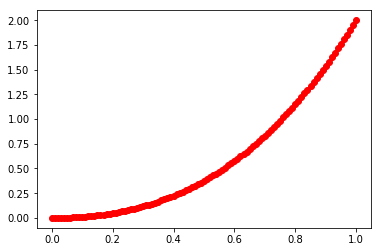

In [131]:
def lagrange_interpolation(xi,f):
    def L(x):
        lg = 0.
        for j,_ in enumerate(xi):
            f_xi = f(xi[j])
            var2 = lagrange_basis(xi,j,x)
            lg += f_xi * var2
        return lg
    return L

Lg = lagrange_interpolation(xi, g)
xi = linspace(0,1,101)
plot(x, g(x))
plot(x, Lg(x))
plot(xi, g(xi), 'or')

In [132]:
# Check for polynomials. This should be **exact**
g = lambda x: x**3+x**2

xi = linspace(0,1,5)
Lg = lagrange_interpolation(xi, g)

x = linspace(0,1,1001)

assert p_norm(g(x) - Lg(x),float('inf')) < 1e-15, 'This should be zero...'

[  1.00000000e+00   9.91689973e-01   9.83426454e-01 ...,  -1.97079450e-03
  -9.92682656e-04   0.00000000e+00]
[ 0.          0.01593076  0.03172343 ...,  0.01051793  0.00529607 -0.        ]
[-0.         -0.01192413 -0.02369702 ..., -0.02369702 -0.01192413  0.        ]
[ 0.          0.00529607  0.01051793 ...,  0.03172343  0.01593076 -0.        ]
[ -0.00000000e+00  -9.92682656e-04  -1.97079450e-03 ...,   9.83426454e-01
   9.91689973e-01   1.00000000e+00]


AssertionError: This should be zero...